In [ ]:
from google.colab import files

# Upload a file (e.g., example.zip)
uploaded = files.upload()


Saving archive.zip to archive (1).zip


In [ ]:
!unzip archive.zip -d mnist_data

Archive:  archive.zip
  inflating: mnist_data/t10k-images-idx3-ubyte/t10k-images-idx3-ubyte  
  inflating: mnist_data/t10k-images.idx3-ubyte  
  inflating: mnist_data/t10k-labels-idx1-ubyte/t10k-labels-idx1-ubyte  
  inflating: mnist_data/t10k-labels.idx1-ubyte  
  inflating: mnist_data/train-images-idx3-ubyte/train-images-idx3-ubyte  
  inflating: mnist_data/train-images.idx3-ubyte  
  inflating: mnist_data/train-labels-idx1-ubyte/train-labels-idx1-ubyte  
  inflating: mnist_data/train-labels.idx1-ubyte  


In [ ]:
!ls mnist_data

t10k-images-idx3-ubyte	t10k-labels-idx1-ubyte	train-images-idx3-ubyte  train-labels-idx1-ubyte
t10k-images.idx3-ubyte	t10k-labels.idx1-ubyte	train-images.idx3-ubyte  train-labels.idx1-ubyte


In [ ]:
import numpy as np
import matplotlib.pyplot as plt

def load_mnist_images(file_path):
    """Load MNIST image file in ubyte format."""
    with open(file_path, 'rb') as f:
        magic_number = int.from_bytes(f.read(4), 'big')
        if magic_number != 2051:
            raise ValueError(f"Invalid magic number {magic_number}, expected 2051")
        num_images = int.from_bytes(f.read(4), 'big')
        num_rows = int.from_bytes(f.read(4), 'big')
        num_cols = int.from_bytes(f.read(4), 'big')
        images = np.frombuffer(f.read(), dtype=np.uint8).reshape(num_images, num_rows * num_cols)
    return images / 255.0  # Normalize to [0, 1]

def load_mnist_labels(file_path):
    """Load MNIST label file in ubyte format."""
    with open(file_path, 'rb') as f:
        magic_number = int.from_bytes(f.read(4), 'big')
        if magic_number != 2049:
            raise ValueError(f"Invalid magic number {magic_number}, expected 2049")
        num_labels = int.from_bytes(f.read(4), 'big')
        labels = np.frombuffer(f.read(), dtype=np.uint8)
    return labels

# File paths
train_images_path = "/content/mnist_data/train-images-idx3-ubyte/train-images-idx3-ubyte"
train_labels_path = "/content/mnist_data/train-labels-idx1-ubyte/train-labels-idx1-ubyte"
test_images_path = "/content/mnist_data/t10k-images-idx3-ubyte/t10k-images-idx3-ubyte"
test_labels_path = "/content/mnist_data/t10k-labels-idx1-ubyte/t10k-labels-idx1-ubyte"

# Load the dataset
x_train = load_mnist_images(train_images_path)
y_train = load_mnist_labels(train_labels_path)
x_test = load_mnist_images(test_images_path)
y_test = load_mnist_labels(test_labels_path)


# visulaizing the data set
# img = x_train[0].reshape(28,28)
# plt.imshow(img, cmap='gray')
# plt.title(f"label: {y_train[0]}")
# plt.show()

fig, axes = plt.subplots(4, 4, figsize=(10, 10))

for i, ax in enumerate(axes.flat):
    img=x_train[i].reshape(28,28)
    ax.imshow(img, cmap='gray')
    ax.set_title(f"Label: {y_train[i]}")
    ax.axis('off')  # Turn off axis

# plt.tight_layout()
# plt.show()








In [ ]:
import numpy as np


In [ ]:
def initialize_parameters(input_size, hidden_size, output_size):
    np.random.seed(0)  # For reproducibility
    W1 = np.random.randn(input_size, hidden_size) * 0.01  # Weights for input to hidden layer
    b1 = np.zeros((1, hidden_size))  # Bias for hidden layer
    W2 = np.random.randn(hidden_size, output_size) * 0.01  # Weights for hidden to output layer
    b2 = np.zeros((1, output_size))  # Bias for output layer
    return W1, b1, W2, b2

  #he initialisation
  #zero initialisation
  #pre trained weight initialisation


In [ ]:
def relu(x):
    return np.maximum(0, x)

def softmax(x):
    exps = np.exp(x - np.max(x, axis=1, keepdims=True))
    return exps / np.sum(exps, axis=1, keepdims=True)


In [ ]:
def relu(x):
    return np.maximum(0, x)

def softmax(x):
    exps = np.exp(x - np.max(x, axis=1, keepdims=True))
    return exps / np.sum(exps, axis=1, keepdims=True)


In [ ]:
def forward_propagation(x, W1, b1, W2, b2):
    z1 = np.dot(x, W1) + b1
    a1 = relu(z1)
    z2 = np.dot(a1, W2) + b2
    a2 = softmax(z2)
    return z1, a1, z2, a2


In [ ]:
def backward_propagation(x, y, z1, a1, z2, a2, W2):
    m = x.shape[0]
    dz2 = a2 - y
    dW2 = np.dot(a1.T, dz2) / m
    db2 = np.sum(dz2, axis=0, keepdims=True) / m

    da1 = np.dot(dz2, W2.T)
    dz1 = da1 * (z1 > 0)  # Derivative of ReLU
    dW1 = np.dot(x.T, dz1) / m
    db1 = np.sum(dz1, axis=0, keepdims=True) / m

    return dW1, db1, dW2, db2


In [ ]:
def update_parameters(W1, b1, W2, b2, dW1, db1, dW2, db2, learning_rate):
    W1 -= learning_rate * dW1
    b1 -= learning_rate * db1
    W2 -= learning_rate * dW2
    b2 -= learning_rate * db2
    return W1, b1, W2, b2


In [ ]:
def one_hot_encode(labels, num_classes=10):
    return np.eye(num_classes)[labels]


In [ ]:
def one_hot_encode(labels, num_classes=10):
    return np.eye(num_classes)[labels]


In [ ]:
def train(x_train, y_train, input_size, hidden_size, output_size, learning_rate, epochs, batch_size, training_loss):
    # Initialize parameters
    W1, b1, W2, b2 = initialize_parameters(input_size, hidden_size, output_size)

    # Convert labels to one-hot encoding
    y_train_one_hot = one_hot_encode(y_train)

    for epoch in range(epochs):
        # Shuffle the data
        indices = np.random.permutation(x_train.shape[0])
        x_train = x_train[indices]
        y_train_one_hot = y_train_one_hot[indices]

        for i in range(0, x_train.shape[0], batch_size):
            x_batch = x_train[i:i + batch_size]
            y_batch = y_train_one_hot[i:i + batch_size]

            # Forward propagation
            z1, a1, z2, a2 = forward_propagation(x_batch, W1, b1, W2, b2)

            # Backward propagation
            dW1, db1, dW2, db2 = backward_propagation(x_batch, y_batch, z1, a1, z2, a2, W2)

            # Update parameters
            W1, b1, W2, b2 = update_parameters(W1, b1, W2, b2, dW1, db1, dW2, db2, learning_rate)

        # Calculate loss
        _, _, _, a2_full = forward_propagation(x_train, W1, b1, W2, b2)
        loss = -np.mean(np.sum(y_train_one_hot * np.log(a2_full + 1e-8), axis=1))

        training_loss.append(loss)


        print(f"Epoch {epoch + 1}/{epochs}, Loss: {loss:.4f}")

    return W1, b1, W2, b2, training_loss


In [ ]:
def test(x_test, y_test, W1, b1, W2, b2):
    _, _, _, a2 = forward_propagation(x_test, W1, b1, W2, b2)
    predictions = np.argmax(a2, axis=1)
    accuracy = np.mean(predictions == y_test)
    print(f"Test Accuracy: {accuracy:.4f}")


Epoch 1/10, Loss: 0.3509
Epoch 2/10, Loss: 0.2798
Epoch 3/10, Loss: 0.2457
Epoch 4/10, Loss: 0.1997
Epoch 5/10, Loss: 0.1806
Epoch 6/10, Loss: 0.1571
Epoch 7/10, Loss: 0.1397
Epoch 8/10, Loss: 0.1233
Epoch 9/10, Loss: 0.1120
Epoch 10/10, Loss: 0.1056
Test Accuracy: 0.9664


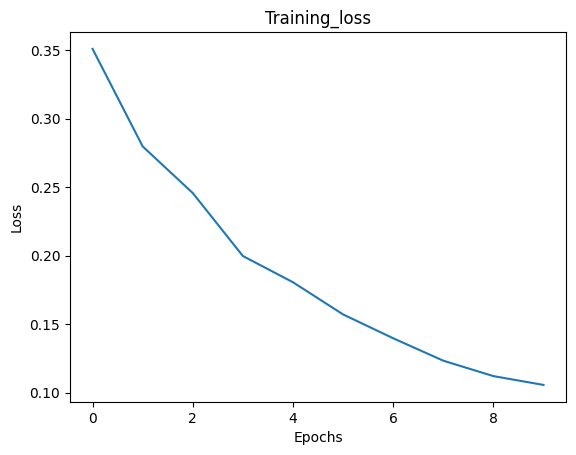

In [ ]:
# Define parameters
input_size = 784  # 28x28 images
hidden_size = 128
output_size = 10  # 10 classes
learning_rate = 0.1
epochs = 10
batch_size = 128
training_loss= []

# Train the model
W1, b1, W2, b2, training_loss = train(x_train, y_train, input_size, hidden_size, output_size, learning_rate, epochs, batch_size, training_loss)

# Test the model
test(x_test, y_test, W1, b1, W2, b2)

plt.plot(training_loss)
plt.title('Training_loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.show()




In [ ]:
import  numpy as np


In [ ]:
np.random.seed(88)  # For reproducibility
#seed will generate numbers according to the number input will scale the normal distribution to that scale
W1 = np.random.randn(1, 2) * 0.01
print(W1)

[[0.01068514 0.00997183]]
